In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [23]:
data= pd.read_csv("Homework_2_input_data.csv")
data.head()

,Unnamed: 0,CASE_1,CASE_1.1,CASE_1.2,CASE_1.3,CASE_1.4,CASE_1.5,CASE_1.6,CASE_1.7,CASE_1.8,...,CASE_2.14,CASE_2.15,CASE_2.16,CASE_2.17,CASE_2.18,CASE_2.19,CASE_2.20,CASE_2.21,CASE_2.22,CASE_2.23
0,Neptun,"P(State_A,Action_{A_B},State_B)","P(State_A,Action_{A_C},State_C)","P(State_B,Action_{B_D}_1,State_D)","P(State_B,Action_{B_D}_2,State_D)","P(State_C,Action_{C_D}_1,State_D)","P(State_C,Action_{C_D}_2,State_D)","Pjam(A_{A,B})","Reward_jam(A_{A,B})","Reward_normal(A_{A,B})",...,"Reward_normal(B_{B,D}_1)","Pjam(B_{B,D}_2)","Reward_jam(B_{B,D}_2)","Reward_normal(B_{B,D}_2)","Pjam(C_{C,D}_1)","Reward_jam(C_{C,D}_1)","Reward_normal(C_{C,D}_1)","Pjam(C_{C,D}_2)","Reward_jam(C_{C,D}_2)","Reward_normal(C_{C,D}_2)"
1,MDQVIC,1,1,1,1,1,1,0.7,-32,-3,...,-15,0.07,-41,-2,0.25,-44,-25,0.45,-50,-7
2,SKCWF3,1,1,1,1,1,1,0.45,-52,-7,...,-17,0.84,-33,-7,0.76,-37,-17,0.91,-59,-15
3,P622VN,1,1,1,1,1,1,0.65,-54,-27,...,-22,0.57,-60,-2,0.58,-56,-29,0.93,-36,-2
4,DIP0FH,1,1,1,1,1,1,0.77,-36,-11,...,-10,0.96,-46,-16,0.25,-34,-5,0.97,-31,-29


In [8]:
S= [ State_A, State_B, State_C,State_D ]
# A= [ Action_{A_B},Action_{A_C},
#      Action_{B_D}_1,Action_{B_D}_2,
#      Action_{C_D}_1,Action_{C_D}_2]
A= [left,right]

SyntaxError: invalid syntax (Temp/ipykernel_14720/717886470.py, line 2)

In [12]:
# dict_1= {1:{1:}
    
#          1:{}
#         }
d={'A':0,
   'B':1,
   'C':2,
   'D':0}

# Case1:

In [24]:
data.set_index("Unnamed: 0", inplace=True )
parameters = data.loc['P622VN']
print(type(parameters))
print(parameters)

<class 'pandas.core.series.Series'>
CASE_1          1
CASE_1.1        1
CASE_1.2        1
CASE_1.3        1
CASE_1.4        1
CASE_1.5        1
CASE_1.6     0.65
CASE_1.7      -54
CASE_1.8      -27
CASE_1.9     0.22
CASE_1.10     -38
CASE_1.11     -23
CASE_1.12    0.92
CASE_1.13     -37
CASE_1.14     -28
CASE_1.15    0.95
CASE_1.16     -57
CASE_1.17     -12
CASE_1.18    0.31
CASE_1.19     -46
CASE_1.20     -28
CASE_1.21    0.81
CASE_1.22     -32
CASE_1.23      -9
CASE_2       0.84
CASE_2.1     0.72
CASE_2.2     0.72
CASE_2.3     0.91
CASE_2.4     0.71
CASE_2.5     0.88
CASE_2.6     0.47
CASE_2.7      -60
CASE_2.8       -2
CASE_2.9     0.64
CASE_2.10     -44
CASE_2.11     -10
CASE_2.12    0.43
CASE_2.13     -49
CASE_2.14     -22
CASE_2.15    0.57
CASE_2.16     -60
CASE_2.17      -2
CASE_2.18    0.58
CASE_2.19     -56
CASE_2.20     -29
CASE_2.21    0.93
CASE_2.22     -36
CASE_2.23      -2
Name: P622VN, dtype: object


In [25]:
def getReward(action,parameters,case=1):
  n = random.random()
  
  if case == 1 and action == 0:
    if n < parameters[0]:
      R = parameters[0]*parameters[1] + (1-parameters[0])*parameters[2]
    else:
      R = (1-parameters[0])*parameters[2]
  elif case == 1 and action == 1:
    if n < parameters[3]:
      R = parameters[3]*parameters[4] + (1-parameters[3])*parameters[5]
    else:
      R = (1-parameters[3])*parameters[5]
  
  
  if case == 2 and action == 0:
    if n < parameters[6]:
      R = parameters[6]*parameters[7] + (1-parameters[6])*parameters[8]
    else:
      R = (1-parameters[6])*parameters[8]
  elif case == 2 and action == 1:
    if n < parameters[9]:
      R = parameters[9]*parameters[10] + (1-parameters[9])*parameters[11]
    else:
      R = (1-parameters[9])*parameters[11]
  
  return R

In [32]:
def Q_learning(total_episodes,parameters,case=1):
  
  epsilon = 1.0 
  actions = [0,1]  # 0-> A , 1 -> B
  qtable = np.array([0.0,0.0])
  rewards_A = []
  rewards_B = []
  trackingList = []

  for episode in range(total_episodes): 
    
    #exp_exp_tradeoff = random.uniform(0, 1)
    exp_exp_tradeoff = random.random()
    
    if exp_exp_tradeoff > epsilon:
        action = np.argmax(qtable)   # If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
    else:
        action = random.choice(actions)  # Else doing a random choice --> exploration 

    
    E_reward = getReward(action,parameters,case)

    if action == 0:
      rewards_A.append(E_reward)
    else:
      rewards_B.append(E_reward)


    qtable[action] =  E_reward + discount_rate * qtable[action]

    trackingList.append([episode,qtable[0],qtable[1]])

    
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)


  print("Q-table" , qtable)
  return rewards_A , rewards_B , trackingList 

In [33]:
total_episodes = 1000
discount_rate = 0.99
           
max_epsilon = 1.0             
min_epsilon = 0.01            
decay_rate = 0.005            

## Calling the functions

In [34]:
rewards_A_case1 , rewards_B_case1 , trackingList_case1= Q_learning(total_episodes,parameters,case=1)

TypeError: '<' not supported between instances of 'float' and 'str'

In [29]:
# Calculate and print the average reward of bridge A and B in the first case
print("The reward of choosing the bridge A, case 1: " , str(np.average(rewards_A_case1)))
print("The reward of choosing the bridge B, case 1: " , str(np.average(rewards_B_case1)))

NameError: name 'rewards_A_case1' is not defined

In [9]:
print("Bridge A was chosen" , str(len(rewards_A_case1)) , "times")
print("Bridge A was chosen" , str(len(rewards_B_case1)), "times")

Bridge A was chosen 740 times
Bridge A was chosen 260 times


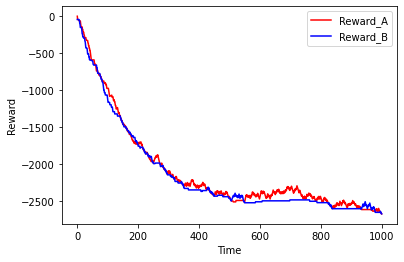

In [10]:
time1 = []
R_A1 = []
R_B1 =[]
for lst in trackingList_case1:
  time1.append(lst[0])
  R_A1.append(lst[1])
  R_B1.append(lst[2])

plt.plot(time1, R_A1, 'r', label='Reward_A') 
plt.plot(time1, R_B1, 'b', label='Reward_B') 

plt.xlabel('Time')
plt.ylabel('Reward')
plt.legend()
plt.show()

In [11]:
rewards_A_case2 , rewards_B_case2 , trackingList_case2= Q_learning(total_episodes,parameters,case=2)

IndexError: index 9 is out of bounds for axis 0 with size 6

In [ ]:
print("Bridge A was chosen" , str(len(rewards_A_case2)) , "times")
print("Bridge A was chosen" , str(len(rewards_B_case2)), "times")

In [ ]:
# Calculate and print the average reward of bridge A and B in the second case
print("The reward of choosing the bridge A, case 2: " , str(np.average(rewards_A_case2)))
print("The reward of choosing the bridge B, case 2: " , str(np.average(rewards_B_case2)))

In [ ]:
time2 = []
R_A2 = []
R_B2 =[]
for lst in trackingList_case2:
  time2.append(lst[0])
  R_A2.append(lst[1])
  R_B2.append(lst[2])

plt.plot(time2, R_A2, 'r', label='Reward_A') 
plt.plot(time2, R_B2, 'b', label='Reward_B') 

plt.xlabel('Time')
plt.ylabel('Reward')
plt.legend()
plt.show()

In [1]:
# !pip install gym

     -------------------------------------- 626.2/626.2 KB 5.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for gym: filename=gym-0.23.1-py3-none-any.whl size=701379 sha256=881cf5ac6d6fd56e5a708e21f5317eb7b6d9b4549a6948beb7a64d6a9d97529f
  Stored in directory: c:\users\mohammed\appdata\local\pip\cache\wheels\4e\be\7e\92a54668db96883e38ce60a9249dc55de7cd6eee49e7311940
Successfully built gym
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.8.1
    Uninstalling importlib-metadata-4.8.1:
      Successfully uninstalled importlib-metadata-4.8.1


You should consider upgrading via the 'C:\Users\Mohammed\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
import gym
env = gym.make('CartPole-v0')
env.reset()
for _ in range(1000):
    env.render()
    env.step(env.action_space.sample()) # take a random action
env.close()

C:\Users\Mohammed\anaconda3\lib\site-packages\gym\envs\classic_control\cartpole.py:163: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  logger.warn(


In [5]:
# !pip install pygame